In [139]:
import requests
from requests.auth import HTTPBasicAuth
import csv
from datetime import datetime, date
import matplotlib.pyplot as plt

In [125]:
with open('ravelry_auth.csv') as f:
    reader = csv.reader(f)
    rav_auth = list(reader)

In [126]:
# Get pattern id's for specific query
URL = "https://api.ravelry.com/patterns/search.json"
PARAMS = {'query':'cardigan', 'page': 1, 'weight': 'worsted'}

r1 = requests.get(url = URL, params = PARAMS, auth=HTTPBasicAuth(rav_auth[0][0], rav_auth[0][1])) 

In [127]:
# convert ID format for next query
r1_json = r1.json()
id_list = ''
for key in range(len(r1_json['patterns'])):
    id_list += (str(r1_json['patterns'][key]['id']) + ' ')
id_list = id_list[:-1]
#print(id_list)

In [128]:
# get pattern details
URL = "https://api.ravelry.com/patterns.json"
PARAMS = {'ids':id_list}

r2 = requests.get(url = URL, params = PARAMS, auth=HTTPBasicAuth(rav_auth[0][0], rav_auth[0][1]))
#print(r2.url)

In [129]:
r2_json = r2.json()
patterns = r2_json['patterns']

In [144]:
# Let's try making a plot with some of this data
# I have a theory that patterns that have been around longer
# will have more favorites (Favorites are like "likes"). Is that true?
# Make dictionary of cases with valid publication dates
plot_data = {}
for key in patterns:
    pubdate = patterns[key]['published']
    if pubdate is not None:
        plot_data[datetime.strptime(pubdate, '%Y/%m/%d').date()] = patterns[key]['favorites_count']
#print(plot_data)

Text(0.5, 1.0, 'Favorites vs pattern age for a sample')

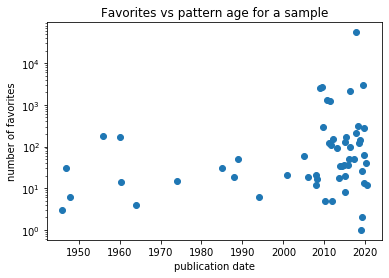

In [131]:
# Make plot of publication date versus number of favorites
x,y = zip(*sorted(plot_data.items()))
plt.plot_date(x,y)
plt.yscale('log') # log scale because of large outliers
plt.xlabel('publication date')
plt.ylabel('number of favorites')
plt.title('Favorites vs pattern age for a sample')

Text(0.5, 1.0, 'Favorites vs pattern age for a sample')

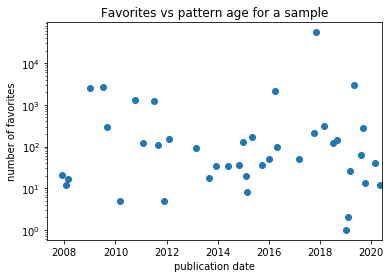

In [143]:
# Ravelry didn't exist in 1950! Let's limit the plot to when the website existed.
# This plot doesn't show a clear relationship between the age of a pattern and the 
# number of favorites. Something else drives pattern popularity.
plt.plot_date(x,y)
plt.yscale('log') # log scale because of large outliers
plt.xlim([date(2007, 5, 1), datetime.now()])
plt.xlabel('publication date')
plt.ylabel('number of favorites')
plt.title('Favorites vs pattern age for a sample')